In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [5]:
df = pd.read_csv("./logatta.csv")

df

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,Travel_Rarely,2,Single,Yes,1,1102,Female,True
1,49,Travel_Frequently,1,Married,No,2,279,Male,False
2,37,Travel_Rarely,2,Single,Yes,4,1373,Male,False
3,33,Travel_Frequently,4,Married,Yes,5,1392,Female,False
4,27,Travel_Rarely,1,Married,No,7,591,Male,False
...,...,...,...,...,...,...,...,...,...
1487,35,Travel_Rarely,3,Married,Yes,1856,682,Male,False
1488,35,Travel_Rarely,4,Divorced,No,1857,1103,Male,False
1489,31,Travel_Rarely,3,Single,Yes,1858,976,Male,False
1490,37,Travel_Rarely,4,Single,No,1859,1351,Female,False


In [6]:
encoder = LabelEncoder()
columns = ["BusinessTravel", "MaritalStatus", "OverTime", "Gender", "accepted for the interview"]

for column in columns:
	df[column] = encoder.fit_transform(df[column])

df

,Age,BusinessTravel,Education,MaritalStatus,OverTime,EmployeeNumber,DailyRate,Gender,accepted for the interview
0,41,2,2,2,1,1,1102,0,1
1,49,1,1,1,0,2,279,1,0
2,37,2,2,2,1,4,1373,1,0
3,33,1,4,1,1,5,1392,0,0
4,27,2,1,1,0,7,591,1,0
...,...,...,...,...,...,...,...,...,...
1487,35,2,3,1,1,1856,682,1,0
1488,35,2,4,0,0,1857,1103,1,0
1489,31,2,3,2,1,1858,976,1,0
1490,37,2,4,2,0,1859,1351,0,0


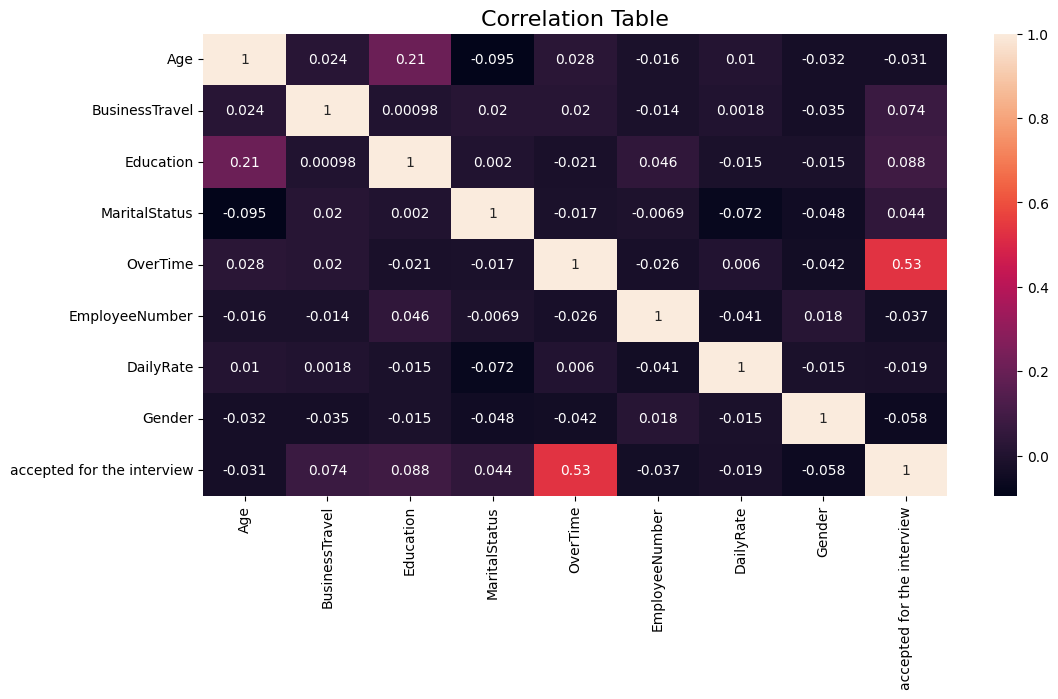

In [7]:
plt.figure(figsize=(12, 6))
sns.heatmap(data=df.corr(), annot=True)
plt.title("Correlation Table", fontsize=16);

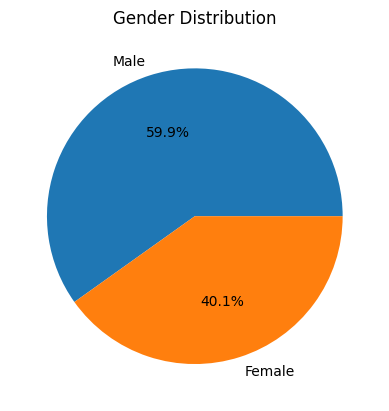

In [8]:
gender_count = list(df['Gender'].value_counts())
labels_names = ["Male", "Female"]

plt.pie(gender_count, labels=labels_names, autopct='%1.1f%%')
plt.title("Gender Distribution");

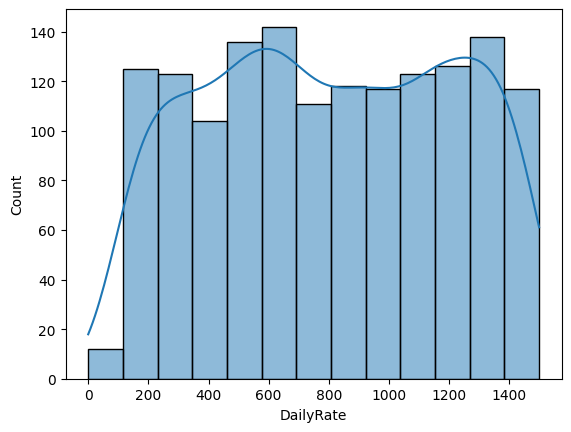

In [9]:
sns.histplot(df['DailyRate'], kde=True);

In [71]:
model = LogisticRegression(max_iter=1000)

In [72]:
X = df.drop(columns=["accepted for the interview"])
y = df["accepted for the interview"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [73]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [75]:
print("accuracy score:", accuracy_score(y_pred, y_test))

accuracy score: 0.9163879598662207


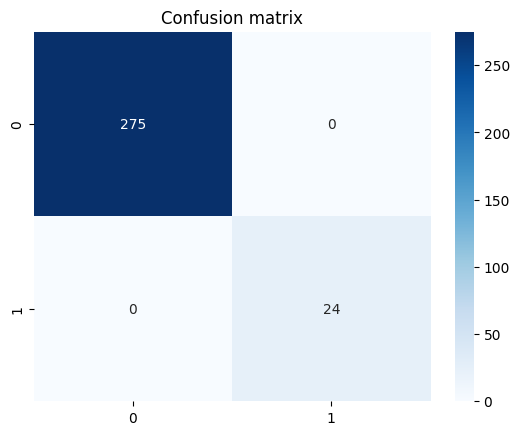

In [94]:
cm = confusion_matrix(y_pred, y_pred)

plt.title('Confusion matrix')

sns.heatmap(cm, cmap="Blues", annot=True, fmt='d');